In [1]:
import pandas as pd
import numpy as np

In [2]:
dataframe = pd.read_csv('F:\Technocolabs Internship\Predicting-Stock-Price-Movement-Using-Crowd-Data\DataSet\Combined_all_binary_same.csv',sep = '\t')
dataframe.head()

C:\Users\Ampolu Nisha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Unnamed: 0.1,symbol,message,datetime,user,message_id,Date,Time,Day_of_week,polarity
0,378949,378949,AAPL,aapl profit margin 22 41 amongst best returns ...,2018-11-21 03:15:56,47688,145861545,2018-11-21,03:15:56,Wednesday,0.0
1,89431,89431,AAPL,aapl us financial system breaking spy,2020-03-18 18:20:59,1223051,201219621,2020-03-18,18:20:59,Wednesday,1.0
2,54701,54701,AAPL,hour moves 39 mean jackshit liquidity hence st...,2020-04-30 22:26:07,236839,209745704,2020-04-30,22:26:07,Thursday,1.0
3,591599,591599,AAPL,spy aapl esactly,2017-07-21 15:13:43,298334,89489798,2017-07-21,15:13:43,Friday,1.0
4,1096480,1096480,AAPL,aapl nothing till 9 55am numbers,2013-06-14 13:09:32,225936,14102695,2013-06-14,13:09:32,Friday,0.0


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6451067 entries, 0 to 6451066
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   Unnamed: 0.1  object 
 2   symbol        object 
 3   message       object 
 4   datetime      object 
 5   user          object 
 6   message_id    object 
 7   Date          object 
 8   Time          object 
 9   Day_of_week   object 
 10  polarity      float64
dtypes: float64(1), int64(1), object(9)
memory usage: 541.4+ MB


In [4]:
dataframe.describe()

,Unnamed: 0,polarity
count,6.451067e+06,6.451061e+06
mean,4.645049e+05,5.124250e-01
std,4.632395e+05,4.998456e-01
min,0.000000e+00,0.000000e+00
25%,9.187800e+04,0.000000e+00
50%,3.026790e+05,1.000000e+00
75%,7.087310e+05,1.000000e+00
max,1.799373e+06,1.000000e+00


In [5]:
dataframe.dtypes

Unnamed: 0        int64
Unnamed: 0.1     object
symbol           object
message          object
datetime         object
user             object
message_id       object
Date             object
Time             object
Day_of_week      object
polarity        float64
dtype: object

In [6]:
dataframe.isnull().sum()

Unnamed: 0         0
Unnamed: 0.1       0
symbol             0
message         1815
datetime           3
user               3
message_id         3
Date               3
Time               3
Day_of_week        6
polarity           6
dtype: int64

In [7]:
dataframe.dropna(subset=['message', 'datetime', 'Day_of_week'], inplace=True)
dataframe.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
dataframe.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
symbol          0
message         0
datetime        0
user            0
message_id      0
Date            0
Time            0
Day_of_week     0
polarity        0
dtype: int64

In [8]:
for i in dataframe.columns:
    print(i,len(dataframe[i].unique()))

Unnamed: 0 1798659
Unnamed: 0.1 1959539
symbol 25
message 5026796
datetime 5304109
user 159918
message_id 5615459
Date 3975
Time 86398
Day_of_week 7
polarity 2


In [9]:
dataframe['Date']=pd.to_datetime(dataframe['Date'])

In [10]:
dataframe.dtypes

Unnamed: 0               int64
Unnamed: 0.1            object
symbol                  object
message                 object
datetime                object
user                    object
message_id              object
Date            datetime64[ns]
Time                    object
Day_of_week             object
polarity               float64
dtype: object

In [11]:
import matplotlib.pyplot as plt

In [12]:
tech_list=dataframe['message'].unique()
dataframe['message'].head()

0    aapl profit margin 22 41 amongst best returns ...
1                aapl us financial system breaking spy
2    hour moves 39 mean jackshit liquidity hence st...
3                                     spy aapl esactly
4                     aapl nothing till 9 55am numbers
Name: message, dtype: object

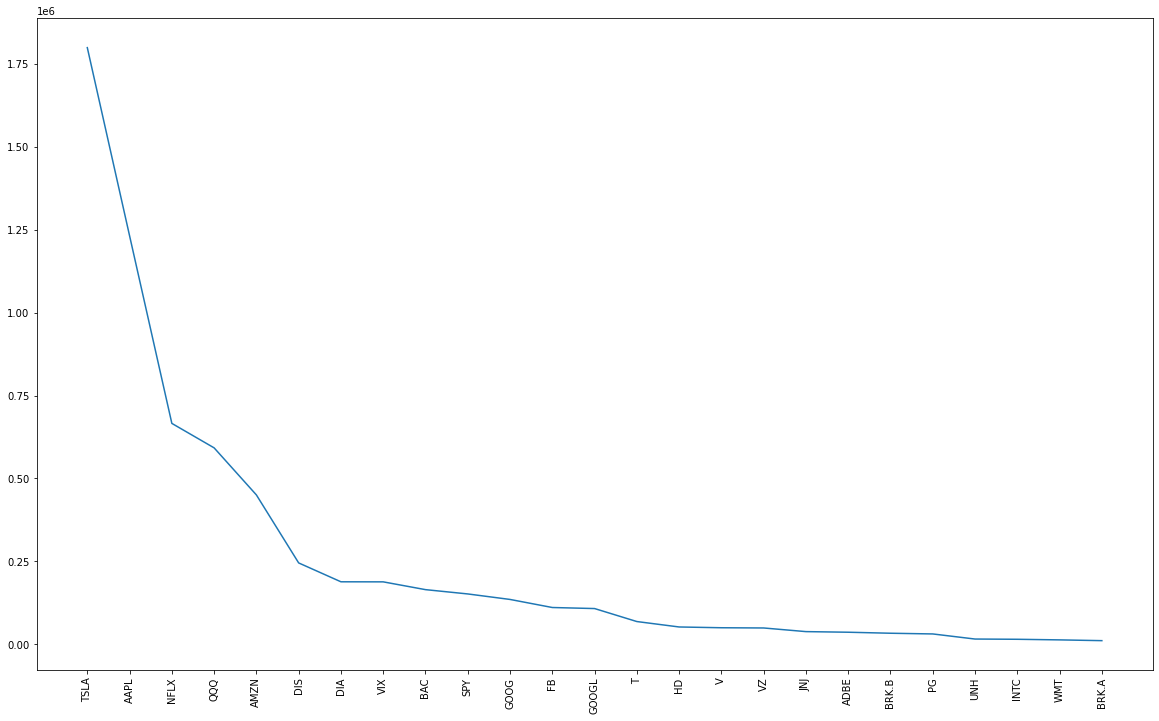

In [13]:
plt.figure(figsize=(20,12))
dataframe['symbol'].value_counts()
plt.plot(dataframe['symbol'].value_counts())
plt.xticks(rotation='vertical')
plt.show()

In [14]:
!pip install plotly

In [15]:
!pip install tweet-preprocessor

In [16]:
import seaborn as sns
import plotly as py

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
import preprocessor as p
import re
re.compile('<title>(.*)</title>')

import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package wordnet to C:\Users\Ampolu
[nltk_data]     Nisha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ampolu
[nltk_data]     Nisha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
tech_list = np.unique(dataframe['symbol'].map(lambda x: x.lower()))
tech_list


array(['aapl', 'adbe', 'amzn', 'bac', 'brk.a', 'brk.b', 'dia', 'dis',
       'fb', 'goog', 'googl', 'hd', 'intc', 'jnj', 'nflx', 'pg', 'qqq',
       'spy', 't', 'tsla', 'unh', 'v', 'vix', 'vz', 'wmt'], dtype=object)

In [19]:
dataframe['message'] = dataframe['message'].str.lower()

In [20]:
# Removing Digits
dataframe['message'] = dataframe['message'].astype(str).str.replace('\d+', '')

# Removing Company names
remove_words = ['aapl', 'adbe', 'amzn', 'bac', 'brk.a', 'brk.b', 'dia', 'dis','fb', 'goog', 'googl', 'hd', 'intc', 'jnj', 'nflx', 'pg', 'qqq','spy', 't', 'tsla', 'unh', 'v', 'vix', 'vz', 'wmt']
pat = r'\b(?:{})\b'.format('|'.join(remove_words))
dataframe['message'] = dataframe['message'].str.replace(pat, '')

# Removing URLs
dataframe['message'] = dataframe['message'].apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))
dataframe['message'] = dataframe['message'].apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))

# Removing Non letter characters
dataframe['message'] = dataframe['message'].apply(lambda x: re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', x))

# Removing mentions and hashtags
dataframe['message'] = dataframe['message'].apply(lambda x: re.sub(r'@[A-Za-z0-9_]+','', x))
dataframe['message'] = dataframe['message'].apply(lambda x: re.sub(r'#[A-Za-z0-9_]+','', x))

In [ ]:
# Tokenization
tknzr = TweetTokenizer()
dataframe['tokens'] = dataframe['message'].apply(tknzr.tokenize)
dataframe[['message', 'tokens']].head()

# Extracting Information from Dow Jones Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('F:\Technocolabs Internship\Predicting-Stock-Price-Movement-Using-Crowd-Data\DataSet\Dow Jones Industrial Average Data.csv')
df.head()

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df['Change %'] = df['Change %'].map(lambda x: x.rstrip('%'))
df['Vol.'] = df['Vol.'].map(lambda x: x.rstrip('M'))
df['Price'] = df['Price'].str.replace(r',', '')
df.info()

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df['Change %']=pd.to_numeric(df['Change %'])
df['Price']=pd.to_numeric(df['Price'])
df.dtypes

In [ ]:
df.describe()

In [ ]:
np.random.seed(0)

# Analyzing the total volume of stock being traded each day
plt.plot(df['Date'], df['Change %'],color = 'green')
plt.title('DAILY CHANGE')
plt.show()

# Analyzing the daily price change
plt.plot(df['Date'], df['Price'],color = 'blue')
plt.title('DAILY PRICE')
plt.show()

plt.hist(df['Change %'],bins = 100)
plt.title('CHANGE % DISTRIBUTION')
plt.show()

plt.hist(df['Price'],bins = 100)
plt.title('PRICE DISTRIBUTION')
plt.show()